In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [63]:
df = pd.read_csv('hypertension_data.csv')
print(df.head(5))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   57  1.0   3       145   233    1        0      150      0      2.3      0   
1   64  0.0   2       130   250    0        1      187      0      3.5      0   
2   52  1.0   1       130   204    0        0      172      0      1.4      2   
3   56  0.0   1       120   236    0        1      178      0      0.8      2   
4   66  0.0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [64]:
df.shape

(26083, 14)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  int64  
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 2.8 MB


In [66]:
df.describe()

age          sex            cp      trestbps          chol  \
count  26083.000000  26058.00000  26083.000000  26083.000000  26083.000000   
mean      55.661389      0.50000      0.958594    131.592992    246.246061   
std       15.189768      0.50001      1.023931     17.588809     51.643522   
min       11.000000      0.00000      0.000000     94.000000    126.000000   
25%       44.000000      0.00000      0.000000    120.000000    211.000000   
50%       56.000000      0.50000      1.000000    130.000000    240.000000   
75%       67.000000      1.00000      2.000000    140.000000    275.000000   
max       98.000000      1.00000      3.000000    200.000000    564.000000   

                fbs       restecg       thalach         exang       oldpeak  \
count  26083.000000  26083.000000  26083.000000  26083.000000  26083.000000   
mean       0.149753      0.526512    149.655024      0.326573      1.039512   
std        0.356836      0.525641     22.858109      0.468969      1.165138   
min        0.000000      0.000000     71.000000      0.000000      0.000000   
25%        0.000000      0.000000    133.000000      0.000000      0.000000   
50%        0.000000      1.000000    153.000000      0.000000      0.800000   
75%        0.000000      1.000000    166.000000      1.000000      1.600000   
max        1.000000      2.000000    202.000000      1.000000      6.200000   

              slope            ca          thal        target  
count  26083.000000  26083.000000  26083.000000  26083.000000  
mean       1.400299      0.721849      2.318752      0.547253  
std        0.616513      1.011608      0.604659      0.497772  
min        0.000000      0.000000      0.000000      0.000000  
25%        1.000000      0.000000      2.000000      0.000000  
50%        1.000000      0.000000      2.000000      1.000000  
75%        2.000000      1.000000      3.000000      1.000000  
max        2.000000      4.000000      3.000000      1.000000

Exploratory data analysis

<Axes: ylabel='target'>

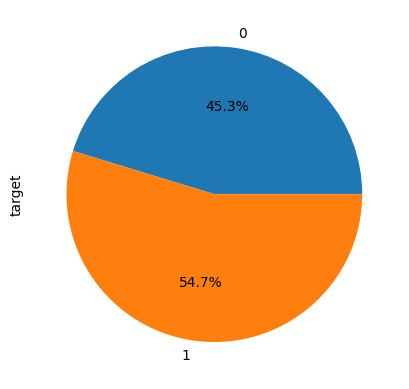

In [67]:
df.groupby('target')['target'].count().plot.pie(autopct="%1.1f%%")

<Axes: ylabel='sex'>

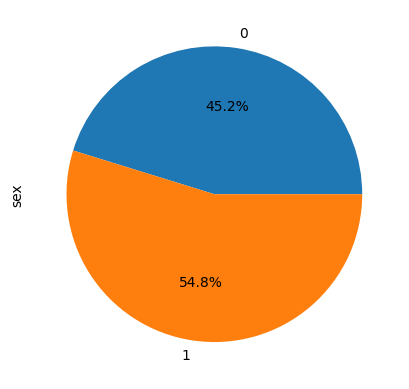

In [68]:
df.groupby('target')['sex'].count().plot.pie(autopct="%1.1f%%")

<Axes: xlabel='sex'>

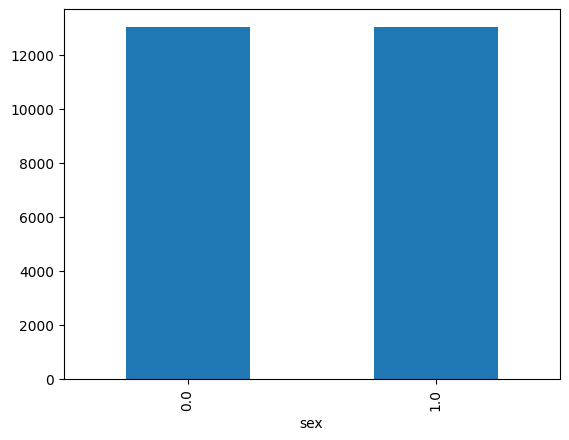

In [69]:
df.groupby('sex')['sex'].count().plot.bar()

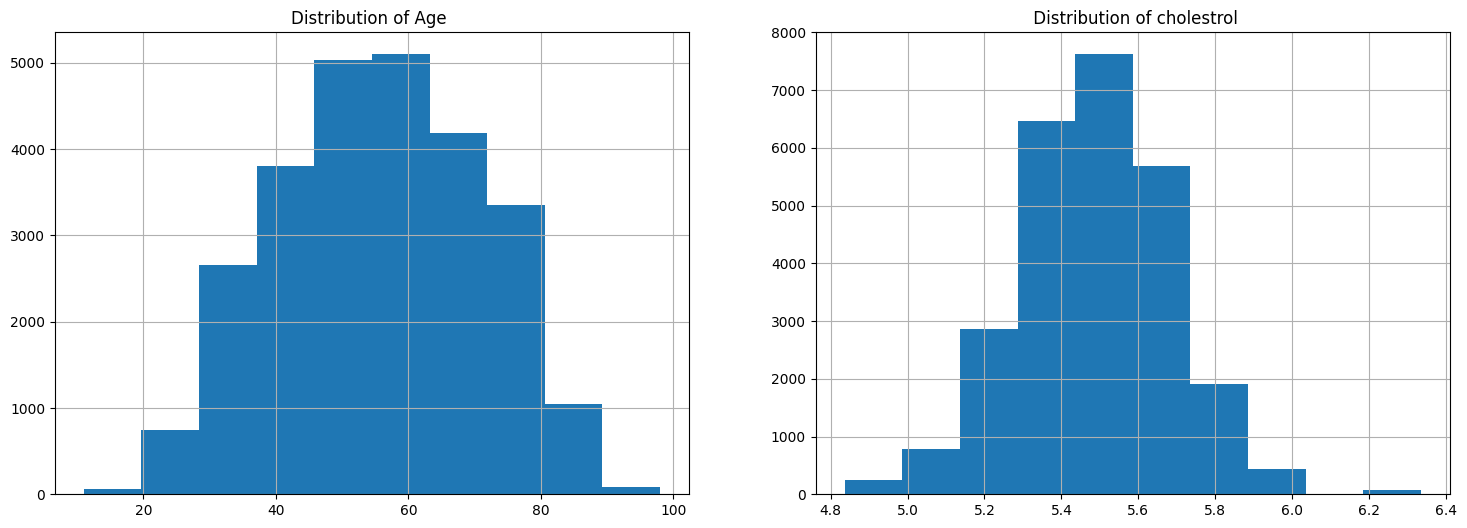

In [70]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
df['age'].hist(bins=10)
plt.title("Distribution of Age ")
plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(df['chol']))
plt.title(" Distribution of cholestrol")

plt.show()

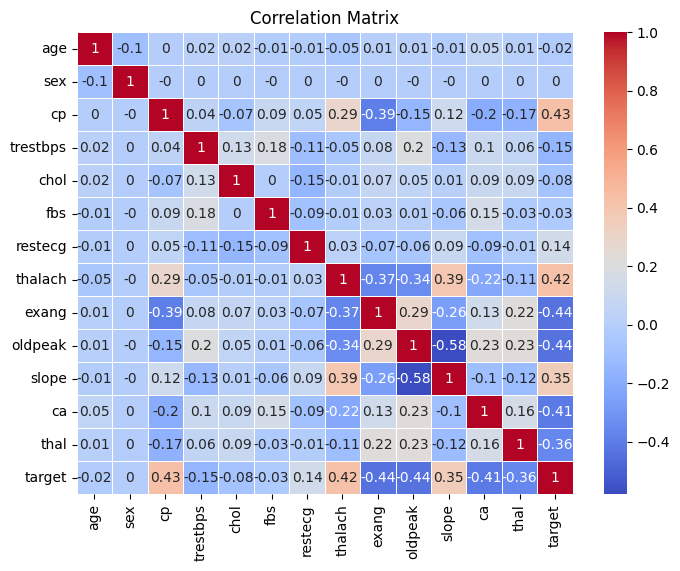

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()

# Round up correlation matrix values to 2 digits
correlation_matrix_rounded = correlation_matrix.round(2)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_rounded, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [72]:
df=df.dropna()

#K-means Clustering

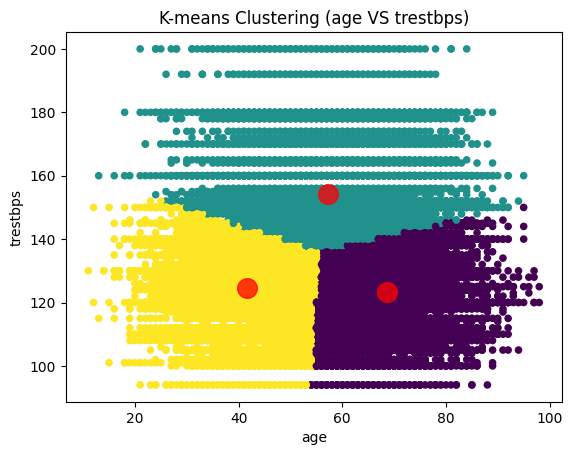

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

X = df[['age', 'trestbps']].values

# Applying K-means clustering
n_clusters = 3  # Change this according to your dataset
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualizing the clustering result
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='viridis')

# Plotting centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.755)
plt.xlabel('age')
plt.ylabel('trestbps')
plt.title('K-means Clustering (age VS trestbps)')
plt.show()

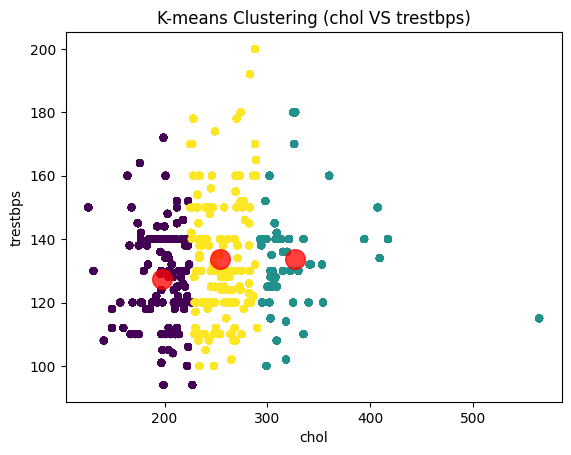

In [74]:
X = df[['chol', 'trestbps']].values

# Applying K-means clustering
n_clusters = 3  # Change this according to your dataset
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualizing the clustering result
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='viridis')

# Plotting centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.755)
plt.xlabel('chol')
plt.ylabel('trestbps')
plt.title('K-means Clustering (chol VS trestbps)')
plt.show()

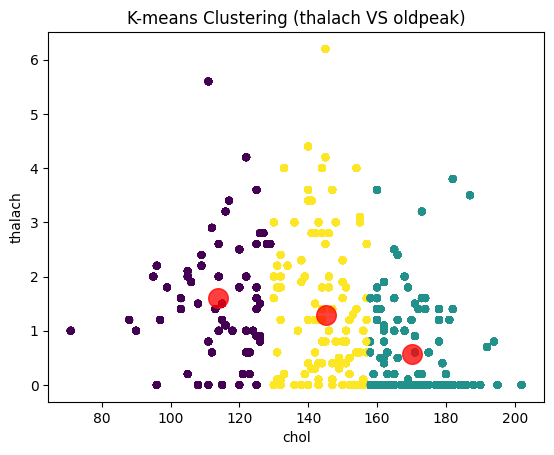

In [75]:
X = df[['thalach', 'oldpeak']].values

# Applying K-means clustering
n_clusters = 3  # Change this according to your dataset
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualizing the clustering result
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='viridis')

# Plotting centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.755)
plt.xlabel('chol')
plt.ylabel('thalach')
plt.title('K-means Clustering (thalach VS oldpeak)')
plt.show()

#Fuzzy C-Means Clustering

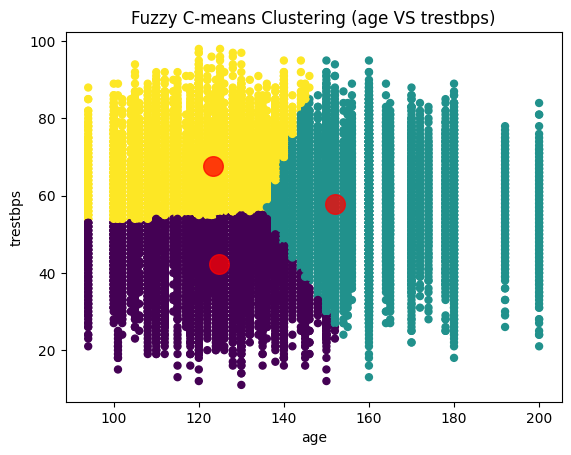

In [76]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def fuzzy_cmeans(X, n_clusters, m=2, error=1e-6, max_iter=1000):
    # Randomly initialize the cluster centers
    centers = np.random.rand(n_clusters, X.shape[1])

    # Iterate until convergence
    for _ in range(max_iter):
        # Compute the membership matrix
        membership = _compute_membership(X, centers, m)

        # Update the cluster centers
        new_centers = _compute_centers(X, membership, m)

        # Check for convergence
        if np.linalg.norm(new_centers - centers) < error:
            break

        centers = new_centers

    # Assign the data points to the cluster with the highest membership
    labels = np.argmax(membership, axis=1)

    return centers, labels

def _compute_membership(X, centers, m):
    distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
    membership = 1 / distances**(2/(m-1))
    membership = membership / np.sum(membership, axis=1)[:, np.newaxis]
    return membership

def _compute_centers(X, membership, m):
    return np.dot(membership.T**m, X) / np.sum(membership**m, axis=0)[:, np.newaxis]



# Assuming your dataset has two features (columns)
X = df[[ 'trestbps', 'age']].values

# Applying Fuzzy C-Means clustering
n_clusters = 3  # Change this according to your dataset
centers, labels = fuzzy_cmeans(X, n_clusters)

# Visualizing the clustering result
plt.scatter(X[:, 0], X[:, 1], c=labels, s=25, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.xlabel('age')
plt.ylabel('trestbps')
plt.title('Fuzzy C-means Clustering (age VS trestbps)')
plt.show()


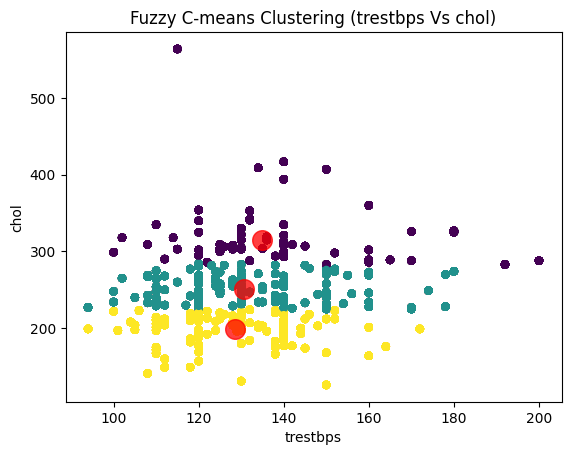

In [77]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def fuzzy_cmeans(X, n_clusters, m=2, error=1e-6, max_iter=1000):
    # Randomly initialize the cluster centers
    centers = np.random.rand(n_clusters, X.shape[1])

    # Iterate until convergence
    for _ in range(max_iter):
        # Compute the membership matrix
        membership = _compute_membership(X, centers, m)

        # Update the cluster centers
        new_centers = _compute_centers(X, membership, m)

        # Check for convergence
        if np.linalg.norm(new_centers - centers) < error:
            break

        centers = new_centers

    # Assign the data points to the cluster with the highest membership
    labels = np.argmax(membership, axis=1)

    return centers, labels

def _compute_membership(X, centers, m):
    distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
    membership = 1 / distances**(2/(m-1))
    membership = membership / np.sum(membership, axis=1)[:, np.newaxis]
    return membership

def _compute_centers(X, membership, m):
    return np.dot(membership.T**m, X) / np.sum(membership**m, axis=0)[:, np.newaxis]


# Assuming your dataset has two features (columns)
X = df[['trestbps', 'chol']].values

# Applying Fuzzy C-Means clustering
n_clusters = 3  # Change this according to your dataset
centers, labels = fuzzy_cmeans(X, n_clusters)

# Visualizing the clustering result
plt.scatter(X[:, 0], X[:, 1], c=labels, s=25, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.xlabel('trestbps')
plt.ylabel('chol')
plt.title('Fuzzy C-means Clustering (trestbps Vs chol)')
plt.show()


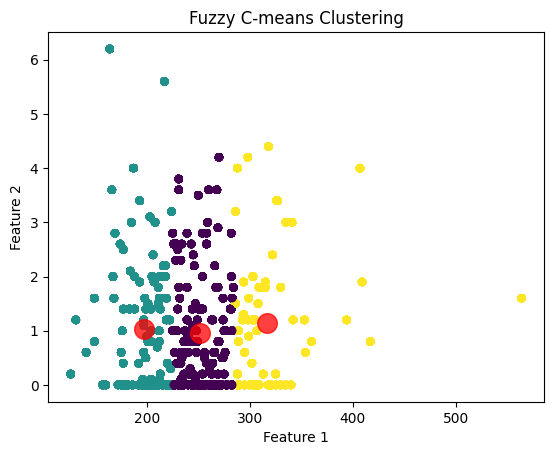

In [78]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def fuzzy_cmeans(X, n_clusters, m=2, error=1e-6, max_iter=1000):
    # Randomly initialize the cluster centers
    centers = np.random.rand(n_clusters, X.shape[1])

    # Iterate until convergence
    for _ in range(max_iter):
        # Compute the membership matrix
        membership = _compute_membership(X, centers, m)

        # Update the cluster centers
        new_centers = _compute_centers(X, membership, m)

        # Check for convergence
        if np.linalg.norm(new_centers - centers) < error:
            break

        centers = new_centers

    # Assign the data points to the cluster with the highest membership
    labels = np.argmax(membership, axis=1)

    return centers, labels

def _compute_membership(X, centers, m):
    distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
    membership = 1 / distances**(2/(m-1))
    membership = membership / np.sum(membership, axis=1)[:, np.newaxis]
    return membership

def _compute_centers(X, membership, m):
    return np.dot(membership.T**m, X) / np.sum(membership**m, axis=0)[:, np.newaxis]

# Load the dataset
# data = pd.read_csv('your_dataset.csv')

# Assuming your dataset has two features (columns)
X = df[['chol', 'oldpeak']].values

# Applying Fuzzy C-Means clustering
n_clusters = 3  # Change this according to your dataset
centers, labels = fuzzy_cmeans(X, n_clusters)

# Visualizing the clustering result
plt.scatter(X[:, 0], X[:, 1], c=labels, s=25, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Fuzzy C-means Clustering')
plt.show()


#Applying PCA

In [79]:
# Standardize numeric features
X_std = (df - np.mean(df, axis=0)) / np.std(df, axis=0)
X_std = np.nan_to_num(X_std, nan=0)
# Calculate the covariance matrix
cov_mat = np.cov(X_std.T)


# calculate eigenvectors and eigenvalues
eigenvals, eigenvecs = np.linalg.eig(cov_mat)
# sort eigenvectors in descending order of eigenvalues
eigenpairs = [(np.abs(eigenvals[i]), eigenvecs[:,i]) for i in
range(len(eigenvals))]
eigenpairs.sort(key=lambda k: k[0], reverse=True)

In [80]:
eigenvals, eigenvecs

(array([3.14278543, 1.35990426, 0.37356294, 0.39485572, 1.21337966,
        0.53316174, 0.59429264, 1.10112059, 0.74430911, 0.81287961,
        0.84218224, 0.90888109, 1.01478637, 0.96443588]),
 array([[ 2.78550431e-02,  4.36829239e-02, -9.61634110e-03,
          9.84367165e-03, -6.65048392e-02, -8.21417343e-03,
          1.01535575e-01, -7.07313017e-01,  5.54857592e-02,
         -2.20133962e-01, -8.20724581e-02, -6.50848095e-01,
          1.25617703e-02, -6.50984132e-04],
        [-1.28374801e-03, -1.19872036e-02, -1.51583758e-03,
          1.60626613e-03,  3.07840103e-02, -1.73743506e-03,
          2.47121834e-02,  6.91009095e-01,  2.14263385e-02,
         -1.16151205e-01, -5.13431881e-02, -7.05074623e-01,
         -8.41132984e-02, -1.80566345e-03],
        [-2.99689401e-01,  3.44230281e-01,  8.23808552e-02,
          2.78657049e-01,  3.49162408e-01,  4.66527378e-01,
         -4.69661025e-01, -3.82524011e-02,  1.97156905e-01,
         -2.48842109e-02,  2.06380181e-01, -5.89566393e-02

Text(0.5, 0, 'Dimensions')

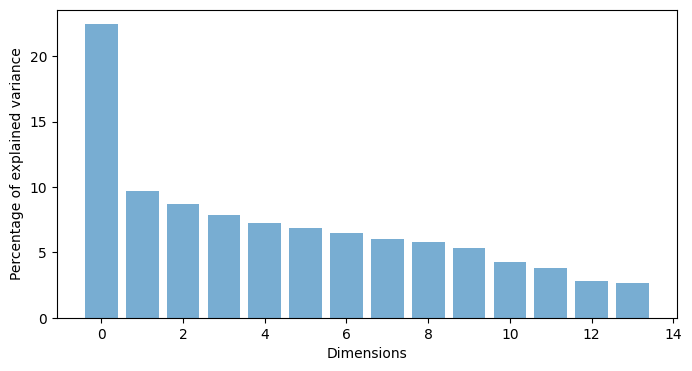

In [81]:
import matplotlib.pyplot as plt
explained_variance=(eigenvals / np.sum(eigenvals))*100
plt.figure(figsize=(8,4))
plt.bar(range(14), sorted(explained_variance,reverse=True), alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

In [82]:
s=0
for i in sorted(eigenvals,reverse=True):
    ind=i/np.sum(sorted(eigenvals,reverse=True))*100
    s+=ind
    index= np.where(sorted(eigenvals,reverse=True) == i)
    print(f"variance explained by {int(index[0])+1} Principal components is {s} %")

variance explained by 1 Principal components is 22.447605874885223 %
variance explained by 2 Principal components is 32.16083496078413 %
variance explained by 3 Principal components is 40.827499949392724 %
variance explained by 4 Principal components is 48.69234519385563 %
variance explained by 5 Principal components is 55.94054112996459 %
variance explained by 6 Principal components is 62.829104485748616 %
variance explained by 7 Principal components is 69.32086310897895 %
variance explained by 8 Principal components is 75.33621970218454 %
variance explained by 9 Principal components is 81.14227977677372 %
variance explained by 10 Principal components is 86.458569425554 %
variance explained by 11 Principal components is 90.70335392839867 %
variance explained by 12 Principal components is 94.51150590636588 %
variance explained by 13 Principal components is 97.33179567766756 %
variance explained by 14 Principal components is 99.99999999999997 %


<ipython-input-82-12ffbf52d63e>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"variance explained by {int(index[0])+1} Principal components is {s} %")


In [83]:
pip install factor_analyzer

Chi-square value: 55041.552242673286
P-value: 0.0
KMO Model: 0.7578912050869824


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


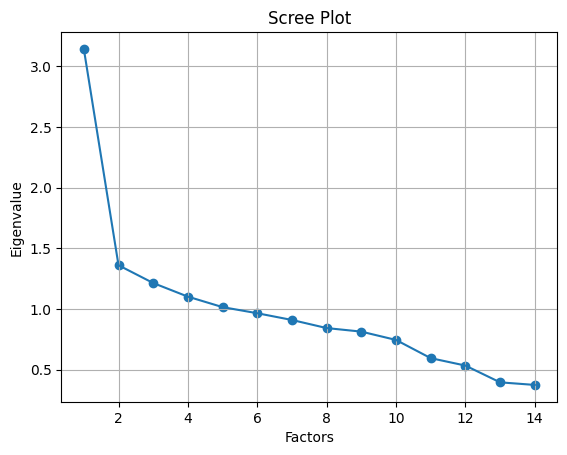

Importance of each factor:
Factor 1: 24.25%
Factor 2: 21.51%
Factor 3: 11.62%
Factor 4: 9.78%
Factor 5: 7.03%
Factor 6: 5.90%
Factor 7: 4.91%
Factor 8: 4.63%
Factor 9: 4.20%
Factor 10: 3.77%
Factor 11: 1.76%
Factor 12: 0.52%
Factor 13: 0.11%
Factor 14: 0.00%
Variance of each factor:
(array([1.46319469, 1.29783151, 0.70073343, 0.59021966, 0.42418895,
       0.35615422, 0.29632932, 0.27920408, 0.25346932, 0.22742777,
       0.10632416, 0.03127194, 0.00638922, 0.        ]), array([0.10451391, 0.09270225, 0.05005239, 0.04215855, 0.03029921,
       0.02543959, 0.02116638, 0.01994315, 0.01810495, 0.01624484,
       0.00759458, 0.00223371, 0.00045637, 0.        ]), array([0.10451391, 0.19721616, 0.24726854, 0.28942709, 0.3197263 ,
       0.34516589, 0.36633227, 0.38627542, 0.40438037, 0.42062521,
       0.42821979, 0.4304535 , 0.43090987, 0.43090987]))
Factor Scores:
[[-1.95867505  1.43711763 -0.68454553 ...  0.19846513  0.01550316
   0.        ]
 [-2.32627732  1.36032912 -0.76752776 ... -0.0

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [84]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame (df)

# Apply Bartlett's test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print(f'Chi-square value: {chi_square_value}\nP-value: {p_value}')

# Apply KMO test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df)
print(f'KMO Model: {kmo_model}')

# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation="varimax")
fa.fit(df)

# Check Eigenvalues
eigen_values, vectors = fa.get_eigenvalues()
plt.scatter(range(1, df.shape[1]+1), eigen_values)
plt.plot(range(1, df.shape[1]+1), eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Perform factor analysis with the determined number of factors
fa = FactorAnalyzer(n_factors=14, rotation="varimax")
fa.fit(df)

# Get factor loadings
loadings = fa.loadings_

# Calculate the importance of each factor based on factor loadings
importance = (loadings**2).sum(axis=0) / (loadings**2).sum() * 100

# Print importance of each factor
print("Importance of each factor:")
for i, imp in enumerate(importance):
    print(f"Factor {i+1}: {imp:.2f}%")

# Get variance of each factor
variance = fa.get_factor_variance()
print("Variance of each factor:")
print(variance)

# Get factor scores
factor_scores = fa.transform(df)
print(f"Factor Scores:\n{factor_scores}")


In [85]:
fa = FactorAnalyzer(n_factors=6,rotation='varimax')
fa.fit(df)
print(pd.DataFrame(fa.loadings_,index=df.columns))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


                 0         1         2         3         4         5
age      -0.014599 -0.014749  0.061399 -0.009430  0.027482 -0.025546
sex      -0.000195  0.000875 -0.011066  0.005978 -0.007883  0.014423
cp        0.634820 -0.000199 -0.120910  0.111807 -0.041916 -0.067880
trestbps  0.039893 -0.192256  0.041775  0.193324  0.321613  0.084652
chol     -0.043247  0.037456  0.065911 -0.053037  0.446642  0.037321
fbs       0.032088 -0.019272  0.033686  0.726628  0.093832  0.005970
restecg   0.068434  0.044333 -0.060941 -0.077898 -0.331973  0.057327
thalach   0.475201  0.381103 -0.150753 -0.025710  0.034986  0.058822
exang    -0.602274 -0.203636 -0.022906  0.045643  0.095659  0.120694
oldpeak  -0.168249 -0.723293  0.138417 -0.019993  0.109952  0.195179
slope     0.195526  0.754880 -0.012743 -0.055431 -0.031097  0.029273
ca       -0.165779 -0.070383  0.826990  0.160380  0.063428  0.151868
thal     -0.206829 -0.109636  0.053797 -0.050307  0.088672  0.528146
target    0.576186  0.316807 -0.27

In [86]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2         3         4         5
Variance          1.469725  1.437965  0.834526  0.622529  0.484525  0.477991
Proportional Var  0.104980  0.102712  0.059609  0.044466  0.034609  0.034142
Cumulative Var    0.104980  0.207692  0.267301  0.311768  0.346376  0.380519


#LDA

In [87]:
mean_data=df.mean()
stroke0=df.loc[df['target'] == 0]
stroke1=df.loc[df['target'] == 1]

m0=stroke0.mean()
m1=stroke1.mean()

In [88]:
cov_stroke0=stroke0.cov()
cov_stroke1=stroke1.cov()
Sb=(m0-m1)*(m0-m1)
Sw=cov_stroke0+cov_stroke1

In [89]:
Sb_c=Sb.to_numpy()
Sw_c=Sw.to_numpy()
Sw_c

array([[ 4.60381251e+02, -1.50011620e+00,  3.56140969e-01,
         9.75217612e+00,  2.40008405e+01, -8.68473255e-02,
        -5.78221645e-02, -2.70829236e+01,  5.92493273e-03,
        -1.08451910e-01,  3.91538779e-03,  1.23013755e+00,
        -3.46024993e-02,  0.00000000e+00],
       [-1.50011620e+00,  5.00038733e-01, -2.11052327e-18,
         3.21849336e-16, -4.49596297e-16, -7.39308499e-19,
        -4.82418899e-18,  3.69764132e-16,  2.18587284e-18,
        -3.82889423e-18,  5.24405153e-18, -4.44894166e-18,
         2.98226932e-20,  0.00000000e+00],
       [ 3.56140969e-01, -2.11052327e-18,  1.68134272e+00,
         3.53874128e+00, -3.60024575e+00,  6.81662766e-02,
        -7.78182360e-03,  5.21831320e+00, -2.05070821e-01,
         7.10306320e-02, -2.97355224e-02, -6.96846919e-02,
        -1.98770047e-02,  0.00000000e+00],
       [ 9.75217612e+00,  3.21849336e-16,  3.53874128e+00,
         6.14550694e+02,  2.23058651e+02,  2.24273735e+00,
        -1.72312245e+00,  8.87189174e+00,  2.

In [90]:
reg_factor = 0.1
Sw_c_reg = Sw_c + reg_factor * np.eye(Sw_c.shape[0])
invSw = np.linalg.inv(Sw_c_reg)
invSw2 = invSw.dot(Sb_c)
invSw2 = invSw @ Sb_c

In [91]:
import numpy as np
from numpy.linalg import eig
[v,d] = eig(invSw)
ld1=df.dot(d[0])
ld1

0       -2.516454
1       -3.605833
2       -1.660513
3       -1.021660
4       -0.847731
           ...   
26078   -2.049334
26079   -1.237915
26080   -0.243084
26081   -0.298807
26082   -0.140021
Length: 26058, dtype: float64

In [92]:
s=0
v1=sorted(v,reverse=True)
for i in v1:
    ind=i/np.sum(v1)*100
    s+=ind
    index= np.where(v1 == i)
    print(f"variance explained by {int(index[0])+1} LDs is {s} %")

variance explained by 1 LDs is 42.530050995978534 %
variance explained by 2 LDs is 55.49512378897974 %
variance explained by 3 LDs is 65.76975019527593 %
variance explained by 4 LDs is 74.04590255501503 %
variance explained by 5 LDs is 81.19236817039709 %
variance explained by 6 LDs is 87.9227225570273 %
variance explained by 7 LDs is 93.49263728998666 %
variance explained by 8 LDs is 95.96953967263053 %
variance explained by 9 LDs is 98.24686093118906 %
variance explained by 10 LDs is 99.97801405624455 %
variance explained by 11 LDs is 99.987299988444 %
variance explained by 12 LDs is 99.99433518390283 %
variance explained by 13 LDs is 99.9991939185365 %
variance explained by 14 LDs is 100.00000000000003 %


<ipython-input-92-b1c8250779f9>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"variance explained by {int(index[0])+1} LDs is {s} %")


In [93]:
import numpy as np

# Define the number of top factors to select
top_factors = 6

# Sort the importance of factors and get the indices of the top factors
top_factor_indices = np.argsort(importance)[::-1][:top_factors]

# Extract the top factor scores from the factor scores matrix
X = factor_scores[:, top_factor_indices]
y = df['target']

In [94]:
X

array([[-1.95867505,  1.43711763, -0.68454553, -1.32029151,  1.52527439,
         0.51292304],
       [-2.32627732,  1.36032912, -0.76752776, -0.25118711, -0.28994241,
         0.05530435],
       [ 0.26050061,  0.50100353, -0.25049074, -0.4429278 , -0.47082946,
         0.097898  ],
       ...,
       [ 1.04887464, -0.38571204,  0.74889231,  0.97131545, -0.71655709,
        -0.71876701],
       [ 1.09042691,  0.06483182,  0.58412179,  0.30352228, -0.25615503,
         0.7886802 ],
       [ 0.22973838,  0.17503344,  0.23289691,  0.30015782, -0.11743984,
        -0.10241476]])

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split( X, y, test_size=0.3, random_state=50)
# X_train = X_train.reset_index(drop=True)
# X_test  = X_test.reset_index(drop=True)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (18240, 6)
X_test (7818, 6)
y_train (18240,)
y_test (7818,)


In [96]:
from sklearn import preprocessing
stdscaler = preprocessing.StandardScaler().fit(X_train)
print("Means of columns: ", stdscaler.mean_, "\nStandard deviation of columns:", stdscaler.scale_)

X_scaled  = stdscaler.transform(X)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

print("X unscaled: ", X[0:5])
print("X scaled:   ", X_scaled[0:5])

Means of columns:  [ 1.80429140e-03  6.48725900e-04  6.19196099e-05 -4.26430234e-03
  1.33160839e-03 -4.23338756e-03] 
Standard deviation of columns: [0.87488246 0.7954996  0.72184898 0.64275715 0.62663591 0.54834982]
X unscaled:  [[-1.95867505  1.43711763 -0.68454553 -1.32029151  1.52527439  0.51292304]
 [-2.32627732  1.36032912 -0.76752776 -0.25118711 -0.28994241  0.05530435]
 [ 0.26050061  0.50100353 -0.25049074 -0.4429278  -0.47082946  0.097898  ]
 [ 0.52595424  0.44031749 -0.33477728 -0.26163479 -0.47568434 -0.22543091]
 [ 0.74306436 -0.90958618 -0.77848303 -0.34321035 -0.31973048 -0.28203835]]
X scaled:    [[-2.24084884  1.80574434 -0.94840815 -2.04747192  2.43194293  0.94311407]
 [-2.66102216  1.70921568 -1.06336602 -0.3841619  -0.46482178  0.10857619]
 [ 0.29569266  0.62898185 -0.34709845 -0.68247159 -0.7534855   0.18625225]
 [ 0.59910899  0.55269514 -0.46386323 -0.40041638 -0.76123302 -0.40338761]
 [ 0.84726818 -1.1442305  -1.07854271 -0.52733143 -0.51235827 -0.50661995]]


In [ ]:
from google.colab import files
src = list(files.upload().values())[0]

open('mlclass(6).py','wb').write(src)
import mlclass
from mlclass import simplemetrics, plot_decision_2d

##Guassian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
predicted = gnb.predict(X_test_scaled)
simplemetrics(predicted,y_test)
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
print('accuracy', accuracy_score(predicted, y_test))
confusion_mat = confusion_matrix(predicted, y_test)

print(classification_report(predicted, y_test))

##Decision Trees

In [ ]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
dtc.fit(X_train_scaled, y_train)
predicted = dtc.predict(X_test_scaled)
simplemetrics(predicted,y_test)
print('accuracy', accuracy_score(predicted,y_test))
confusion_mat = confusion_matrix(predicted,y_test)

print(classification_report(predicted,y_test))

##LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
predicted = lda.predict(X_test_scaled)
simplemetrics(predicted,y_test)
print('accuracy', accuracy_score(predicted,y_test))
confusion_mat = confusion_matrix(predicted,y_test)

print(classification_report(predicted,y_test))

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50,max_depth=100)
rf.fit(X_train_scaled, y_train)
predicted = lda.predict(X_test_scaled)
simplemetrics(predicted,y_test)
print('accuracy', accuracy_score(predicted,y_test))
confusion_mat = confusion_matrix(predicted,y_test)

print(classification_report(predicted,y_test))

#XGB

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the XGBClassifier with desired parameters
xgb = XGBClassifier()

# Fit the XGBClassifier to the training data
xgb.fit(X_train_scaled, y_train)

# Use the XGBClassifier to make predictions
predicted = xgb.predict(X_test_scaled)

# Evaluate the model
simplemetrics(predicted, y_test)
print('accuracy:', accuracy_score(predicted, y_test))
confusion_mat = confusion_matrix(predicted, y_test)

print(classification_report(predicted, y_test))


#QDA

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Quadratic Discriminant Analysis model
qda = QuadraticDiscriminantAnalysis()

# Fit the model to the training data
qda.fit(X_train_scaled, y_train)

# Use the model to make predictions
predicted = qda.predict(X_test_scaled)

# Evaluate the model
simplemetrics(predicted, y_test)
print('accuracy:', accuracy_score(predicted, y_test))
confusion_mat = confusion_matrix(predicted, y_test)

print(classification_report(predicted, y_test))


#Stochastic Logistic Regression

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
# Stochastic Logistic Regression
model = Sequential()

# validation loss
model.add(Dense(units=1,input_shape=[X_train_scaled.shape[1]], activation='sigmoid', kernel_regularizer=l2(0.01)))

# Compile model
sgd = SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['Accuracy'])
model.summary()

In [ ]:
# Fit the model
history = model.fit(X_train_scaled,y_train.values.reshape(-1,1).astype(np.float32),
          epochs = 50, verbose=0, validation_data=(X_test_scaled,y_test.values.reshape(-1,1).astype(np.float32)))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Logistic Regression Model Loss')
plt.ylabel('categorical_crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print("Loss after final iteration: ", history.history['val_loss'][-1])
print("Training loss after final iteration ",history.history['loss'][-1])
plt.show()

In [ ]:
predicted = model.predict(np.array(X_test_scaled))
predicted=np.argmax(predicted,axis=1)
print('accuracy', accuracy_score(y_test,predicted))
confusion_mat = confusion_matrix(y_test,predicted)
print("confusion matrix\n{}\n\n".format(confusion_mat))

print(classification_report(y_test,predicted))

##SVC -Polynomial

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import hinge_loss

svc = SVC(kernel='poly', degree=5, C=1)
svc.fit(X_train_scaled, y_train)
predicted = svc.predict(X_test_scaled)
simplemetrics(predicted,y_test)
print('accuracy', accuracy_score(predicted,y_test))
confusion_mat = confusion_matrix(predicted,y_test)

print(classification_report(predicted,y_test))